In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

## Read the data

In [2]:
data=pd.read_excel('../Datasets/EastWestAirlines.xlsx' ,sheet_name='data', index_col='ID#')

In [3]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [5]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
data.duplicated()

ID#
1       False
2       False
3       False
4       False
5       False
        ...  
4017    False
4018    False
4019    False
4020    False
4021    False
Length: 3999, dtype: bool

# K-Means

In [8]:
kdata=data

In [9]:
kdata.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Scale the data

In [10]:
kscale=StandardScaler()
kscale_df=kscale.fit_transform(kdata)

In [11]:
kscale_df[:5]

array([[-0.45114078, -0.18629869, -0.76957841, -0.09824189, -0.06276658,
        -0.70278627, -1.10406452, -0.32860326, -0.36216787,  1.39545434,
        -0.7669193 ],
       [-0.53945687, -0.18629869, -0.76957841, -0.09824189, -0.06276658,
        -0.7010884 , -0.99992616, -0.32860326, -0.36216787,  1.37995704,
        -0.7669193 ],
       [-0.32003123, -0.18629869, -0.76957841, -0.09824189, -0.06276658,
        -0.5392527 , -0.79164945, -0.32860326, -0.36216787,  1.41192021,
        -0.7669193 ],
       [-0.58379852, -0.18629869, -0.76957841, -0.09824189, -0.06276658,
        -0.68928615, -1.10406452, -0.32860326, -0.36216787,  1.37220839,
        -0.7669193 ],
       [ 0.23967783, -0.18629869,  1.40947095, -0.09824189, -0.06276658,
         1.08312117,  1.49939447,  1.15493205,  0.69249029,  1.36397545,
         1.30391816]])

## Build the data

In [12]:
kmodel=KMeans(n_clusters=4, random_state=42)

In [13]:
kmodel.fit(kscale_df)

KMeans(n_clusters=4, random_state=42)

In [14]:
kmodel.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [15]:
kdata['labels']=kmodel.labels_

In [16]:
kdata.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [17]:
kmodel.inertia_

27154.33116895084

## Hyperparameter tuning

In [18]:
wcss = []
for k in range(1,11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(kscale_df)
    wcss.append(model.inertia_)

In [19]:
wcss

[43989.000000000015,
 35409.51662986132,
 30906.110883899546,
 27154.33116895084,
 24541.4712941113,
 21089.69478480688,
 18891.926703111316,
 17316.774877029908,
 15961.476009310605,
 14728.292655169053]

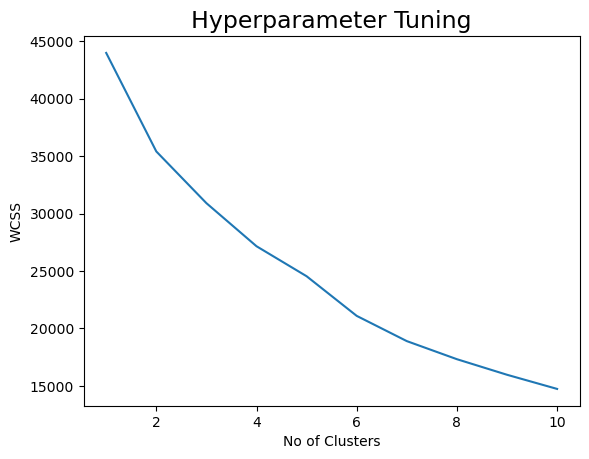

In [20]:
plt.plot(range(1,11),wcss)
plt.title('Hyperparameter Tuning', fontsize=17)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
final_model = KMeans(n_clusters=3,random_state=42)

In [22]:
final_model.fit(kscale_df)

KMeans(n_clusters=3, random_state=42)

In [23]:
final_model.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [24]:
kdata['labels']=final_model.labels_

In [25]:
kdata.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [26]:
grp = kdata.groupby('labels')

In [27]:
for x,y in grp:
    print(y)
    print('_'*60)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
5       97752           0          4          1          1        43300   
7       84914           0          3          1          1        27482   
10     104860           0          3          1          1        28426   
12      96522           0          5          1          1        61105   
16      28495           0          4          1          1        49442   
...       ...         ...        ...        ...        ...          ...   
4002    57793           0          3          1          1        20959   
4003    28867           0          3          1          1        19169   
4008    59017           0          4          1          1        34746   
4014    39142           0          3          1          1        14981   
4019    73597           0          3          1          1        25447   

      Bonus_trans  Fligh

In [28]:
grp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
labels,,,,,,,,,,,
0,117635.571429,126.030498,3.744783,1.002408,1.036918,40624.182986,19.012039,333.447030,0.990369,4884.273676,0.649278
1,44429.433114,98.345483,1.237301,1.019000,1.000388,4854.212098,7.019775,198.970531,0.622334,3711.259791,0.205894
2,190656.775862,951.994253,2.178161,1.034483,1.011494,31181.005747,26.454023,5236.454023,15.252874,4672.270115,0.810345


# Hierarchical

In [29]:
data.drop(['labels'], axis=1 , inplace=True)

In [30]:
hdata=data
hdata.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Scale the data

In [31]:
hscale=MinMaxScaler()
hscale_df=hscale.fit_transform(hdata)

In [32]:
hscale_df[:5]

array([[1.65077268e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.59878264e-04, 1.16279070e-02, 0.00000000e+00,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00],
       [1.12878760e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.15366820e-04, 2.32558140e-02, 0.00000000e+00,
        0.00000000e+00, 8.39884254e-01, 0.00000000e+00],
       [2.42568502e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.56360809e-02, 4.65116279e-02, 0.00000000e+00,
        0.00000000e+00, 8.47841813e-01, 0.00000000e+00],
       [8.66709916e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.89620191e-03, 1.16279070e-02, 0.00000000e+00,
        0.00000000e+00, 8.37955148e-01, 0.00000000e+00],
       [5.73379993e-02, 0.00000000e+00, 7.50000000e-01, 0.00000000e+00,
        0.00000000e+00, 1.64211085e-01, 3.02325581e-01, 6.73978648e-02,
        7.54716981e-02, 8.35905474e-01, 1.00000000e+

## Build the model

In [33]:
hmodel=AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')

In [34]:
hmodel.fit(hscale_df)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=8)

In [35]:
hmodel.labels_

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [36]:
hdata['labels']=hmodel.labels_

In [37]:
hdata.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [38]:
hgrp=hdata.groupby('labels')

In [39]:
for x,y in hgrp:
    print(y)
    print('_'*50)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
8       20856           0          1          1          1         5250   
9      443003           0          3          2          1         1753   
10     104860           0          3          1          1        28426   
18      13958           0          1          1          1         4291   
19      91473           0          3          1          1        27408   
...       ...         ...        ...        ...        ...          ...   
4010    11933           0          1          1          1          249   
4012     2622           0          1          1          1         1625   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   

      Bonus_trans  Fligh

In [40]:
hgrp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
labels,,,,,,,,,,,
0,79918.920175,218.528947,2.098246,1.009649,1.000877,16823.058772,13.392982,740.800877,2.239474,4298.630702,1.000000
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,45074.547804,90.659432,1.187080,1.000000,1.000517,3895.703876,6.797933,230.889406,0.674935,3844.252713,0.000000
3,111769.618705,81.217626,3.543165,1.001799,1.025180,32007.528777,17.089928,214.537770,0.579137,3756.753597,0.000000
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548
5,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000
6,152861.250000,8804.750000,4.000000,1.000000,1.000000,33927.500000,19.000000,500.000000,1.500000,5944.000000,1.000000
7,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000


## plot Dendogram

In [41]:
from scipy.cluster import hierarchy

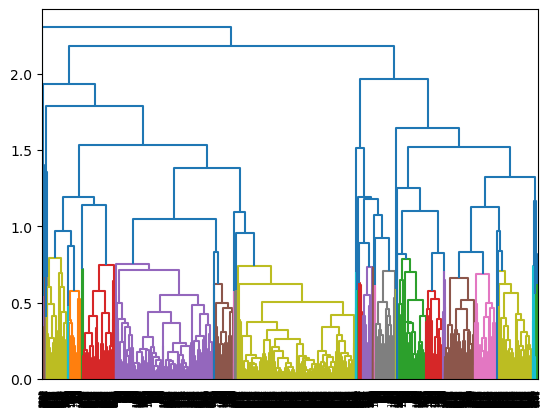

In [42]:
ln = hierarchy.linkage(hscale_df, method='complete')
dn = hierarchy.dendrogram(ln, color_threshold=0.8)

# DBSCAN

In [43]:
data.drop(['labels'], axis=1 , inplace=True)

In [44]:
ddata=data

In [45]:
ddata.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Build the data

In [46]:
dmodel=DBSCAN(min_samples=12)

In [47]:
dmodel.fit(ddata)

DBSCAN(min_samples=12)

In [48]:
dmodel.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [49]:
ddata['labels']=dmodel.labels_

In [50]:
ddata.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,-1
2,19244,0,1,1,1,215,2,0,0,6968,0,-1
3,41354,0,1,1,1,4123,4,0,0,7034,0,-1
4,14776,0,1,1,1,500,1,0,0,6952,0,-1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [51]:
dgrp=ddata.groupby('labels')

In [52]:
for x,y in dgrp:
    print(y)
    print('_'*50)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID#                                                                       
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Fligh

In [53]:
hgrp.agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
labels,,,,,,,,,,,
0,79918.920175,218.528947,2.098246,1.009649,1.000877,16823.058772,13.392982,740.800877,2.239474,4298.630702,1.000000
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,45074.547804,90.659432,1.187080,1.000000,1.000517,3895.703876,6.797933,230.889406,0.674935,3844.252713,0.000000
3,111769.618705,81.217626,3.543165,1.001799,1.025180,32007.528777,17.089928,214.537770,0.579137,3756.753597,0.000000
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548
5,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000
6,152861.250000,8804.750000,4.000000,1.000000,1.000000,33927.500000,19.000000,500.000000,1.500000,5944.000000,1.000000
7,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
